<a href="https://colab.research.google.com/github/chaudhary-dotcom/linearRegression/blob/main/multipleLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
df = pd.read_csv('/content/Student_Performance.csv')

In [6]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [7]:
df.shape

(10000, 6)

In [8]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


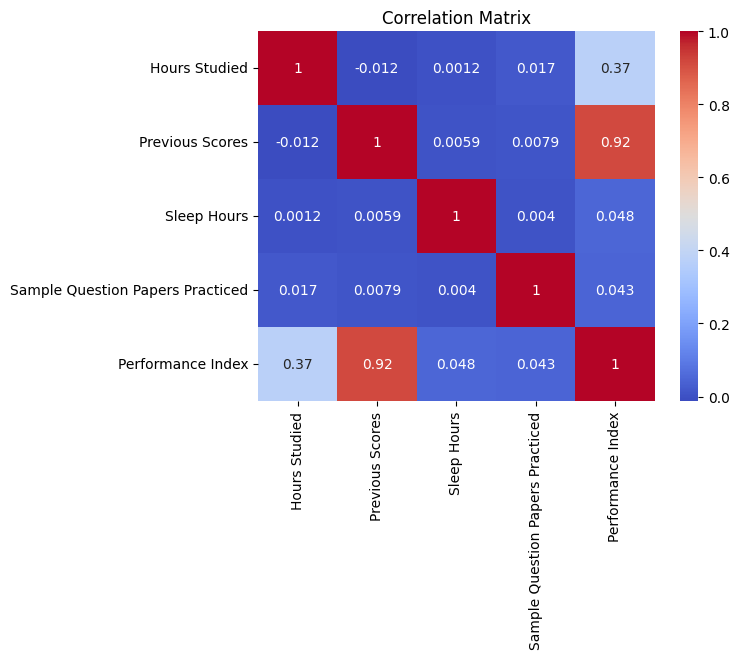

In [9]:
correlation_matrix = df[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [10]:
fig = px.scatter_3d(df, x='Hours Studied', y='Sleep Hours', z='Performance Index')
fig.show()

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

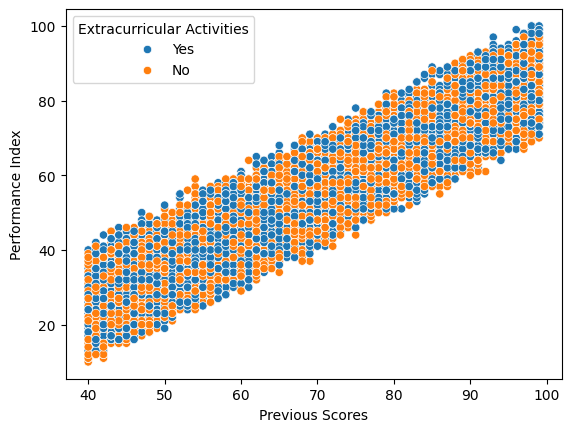

In [12]:
sns.scatterplot(data=df, x='Previous Scores', y='Performance Index', hue='Extracurricular Activities')

In [13]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [14]:
df["Extracurricular Activities"].unique()

array(['Yes', 'No'], dtype=object)

In [31]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [37]:
X = df.drop(columns=['Extracurricular Activities', 'Performance Index'])
y = df.iloc[:, -1]


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [40]:
X_train.head(5)

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
3194,2,67,5,7
1507,3,63,8,1
3438,7,99,4,1
9707,4,52,4,6
9689,3,52,5,7


In [44]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [45]:
lr.coef_

array([2.8541062 , 1.01984798, 0.48061978, 0.19580025])

In [46]:
lr.intercept_

np.float64(-33.87484968428724)

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [54]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('Train MAE: ', mean_absolute_error(y_train, y_pred_train))

MAE: 1.6401830463368945
Train MAE:  1.6367658388333863


In [55]:
y_pred_train = lr.predict(X_train)

In [56]:
print('R2 Score: ', r2_score(y_test, y_pred))
print('Train of R2 score: ', r2_score(y_train, y_pred_train))

R2 Score:  0.9887605456205321
Train of R2 score:  0.9883785197965099


In [58]:
print('MSE: ', mean_squared_error(y_test, y_pred))
print('Train MSE: ', mean_squared_error(y_train, y_pred_train))

MSE:  4.2608938595831525
Train MSE:  4.239380823738828
